In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 

## Load Dataset

In [2]:
# load the npy data from ./dataset/

data_dir = '../data/'

folder_path = os.path.join(data_dir, 'dataset')

files = [f for f in os.listdir(folder_path) if f.endswith('.npy')]

# load numpy files

data = []
for file in files:
    file_path = os.path.join(folder_path, file)
    data.append(np.load(file_path))

Text(0.5, 1.0, 'Sample Image')

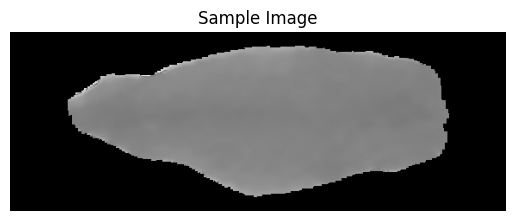

In [3]:
# plot one of the images

plt.imshow(data[12339], cmap='gray')
plt.axis('off') 
plt.title('Sample Image')

## Calculate some metrics

In [13]:
# max and min values, min value different from 0

print("Max value in the image:", np.nanmax(data[12339]))

print("Min value in the image different from 0:", np.nanmin(data[12339][data[12339] > 0]))

Max value in the image: 3630.0
Min value in the image different from 0: 1740.0


In [ ]:
# replace 0 by nan all images
data = [np.where(img == 0, np.nan, img) for img in data]

In [ ]:
# data to numpy array
numpy_data = np.array(data)

In [30]:
mean = np.nanmean(numpy_data)
std = np.nanstd(numpy_data)


min = np.nanmin(numpy_data)
max = np.nanmax(numpy_data)

print("Mean value of all images:", mean)
print("Standard deviation of all images:", std)

print("Min value of all images:", min)
print("Max value of all images:", max)


Mean value of all images: 1742.455712759903
Standard deviation of all images: 225.99228333865597
Min value of all images: 488.0
Max value of all images: 65535.0


{'whiskers': [<matplotlib.lines.Line2D at 0x732d75e38c40>,
 'caps': [<matplotlib.lines.Line2D at 0x732d75e39240>,
 'boxes': [<matplotlib.lines.Line2D at 0x732d75e38a60>],
 'medians': [<matplotlib.lines.Line2D at 0x732d75e39840>],
 'fliers': [<matplotlib.lines.Line2D at 0x732d75e39b40>],
 'means': []}

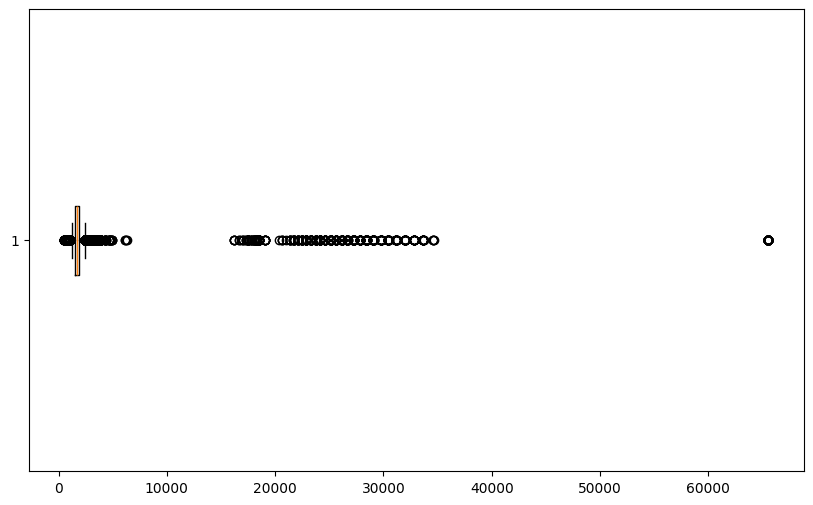

In [33]:
# box plot of elements in the images without nan values

plt.figure(figsize=(10, 6))
plt.boxplot(numpy_data[~np.isnan(numpy_data)], vert=False)

# Clip the values on the 1st and  99th percentile

In [4]:
# clip the values on the 1st and  99th percentile
percentile_1 = np.nanpercentile(numpy_data, 1)
percentile_99 = np.nanpercentile(numpy_data, 99)

print("1st percentile value of all images:", percentile_1)
print("99th percentile value of all images:", percentile_99)

NameError: name 'numpy_data' is not defined

In [ ]:
# clip the values on the 1st and  99th percentile
numpy_data = np.clip(numpy_data, percentile_1, percentile_99)

{'whiskers': [<matplotlib.lines.Line2D at 0x732d75e95f30>,
 'caps': [<matplotlib.lines.Line2D at 0x732d75e96410>,
 'boxes': [<matplotlib.lines.Line2D at 0x732d75e95c30>],
 'medians': [<matplotlib.lines.Line2D at 0x732d75e96a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x732d75e96d10>],
 'means': []}

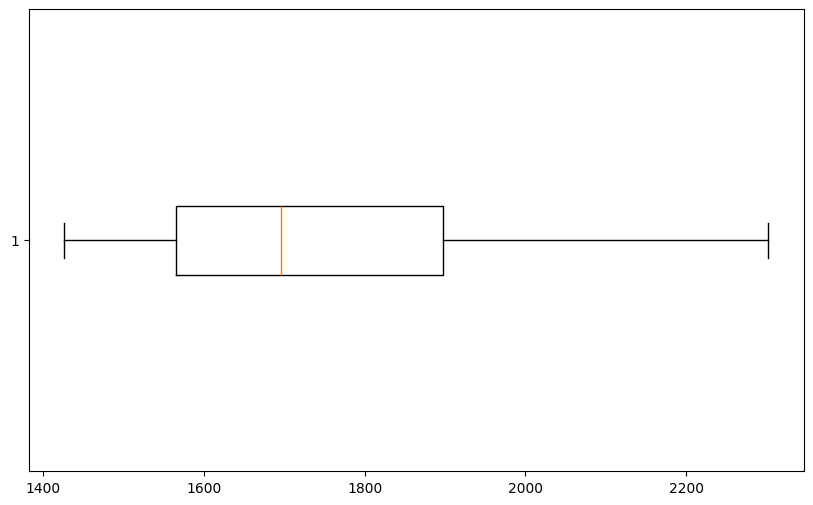

In [37]:
# box plot of elements in the images without nan values

plt.figure(figsize=(10, 6))
plt.boxplot(numpy_data[~np.isnan(numpy_data)], vert=False)

In [ ]:
# new mean and std after clipping

min = np.nanmin(numpy_data)
max = np.nanmax(numpy_data)

print("Mean value of all images:", mean)
print("Standard deviation of all images:", std)

print("Min value of all images:", min)
print("Max value of all images:", max)


Mean value of all images: 1739.161741809428
Standard deviation of all images: 208.93148296605867
Min value of all images: 1426.0
Max value of all images: 2302.0


In [50]:
# normalize the images

normalized_data = (numpy_data - min) / (max - min)


{'whiskers': [<matplotlib.lines.Line2D at 0x732d7c3dcdf0>,
 'caps': [<matplotlib.lines.Line2D at 0x732d7c3dd450>,
 'boxes': [<matplotlib.lines.Line2D at 0x732d7c3df730>],
 'medians': [<matplotlib.lines.Line2D at 0x732d7c555120>],
 'fliers': [<matplotlib.lines.Line2D at 0x732d7c554d00>],
 'means': []}

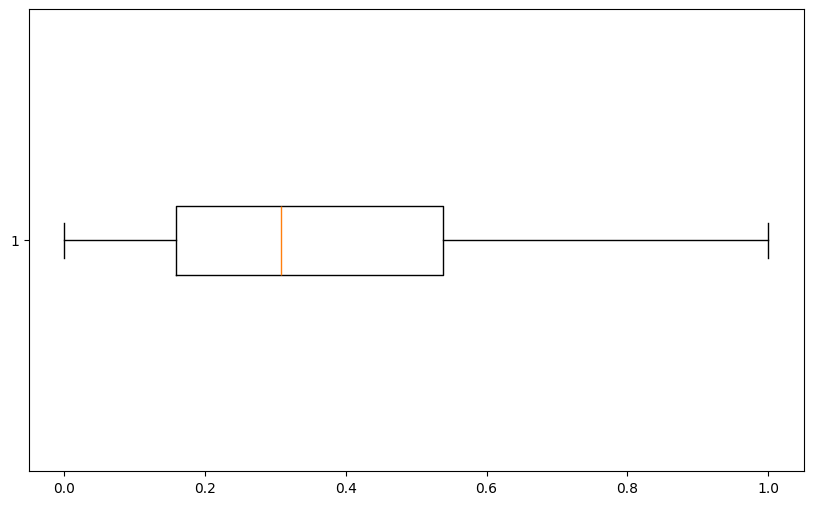

In [51]:
# box plot of elements in the images without nan values

plt.figure(figsize=(10, 6))
plt.boxplot(normalized_data[~np.isnan(numpy_data)], vert=False)

##  Add White Noise

In [53]:
# replace nan by white noise

normalized_data = np.where(np.isnan(normalized_data), np.random.normal(0, 1, normalized_data.shape), normalized_data)

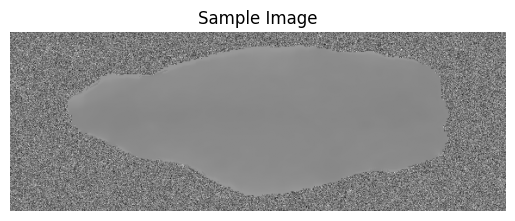

In [54]:
# plot one of the imagens

plt.imshow(normalized_data[12339], cmap='gray')
plt.axis('off')
plt.title('Sample Image')
plt.show()

## Save the Normalized Dataset

In [ ]:
# write the normalized data to a new folder

output_folder_path = os.path.join(data_dir, 'normalized_dataset')

os.makedirs(output_folder_path, exist_ok=True)

for i in range(len(normalized_data)):
    file_name = os.path.join(output_folder_path, f'image_{i}.npy')
    np.save(file_name, normalized_data[i])
